# 기본 등산로

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("./data/등산로.csv", encoding="UTF-8")
df1 = df1.set_index('산코드') #index 산코드로 설정
df1 = df1.drop(['산id', '등산로순번_확실치않음'], axis=1)
df1.head(5)

,산명,등산로순번,등산로명,등산로주요지점내용,등산로길이(km),등산로난이도명,등산로상행시간,등산로하행시간,등산로재질내용,등산로통제여부,등산로폐쇄여부,등산로위험구간내용,등산로추천여부
산코드,,,,,,,,,,,,,
451100101,가련산,172,덕진동1가구간,NaN,0.13,쉬움,2.0,2.0,NaN,NaN,NaN,NaN,NaN
451100101,가련산,173,덕진동1가구간,NaN,0.04,쉬움,1.0,0.0,NaN,NaN,NaN,NaN,NaN
451100101,가련산,174,덕진동2가구간,NaN,0.02,쉬움,1.0,0.0,NaN,NaN,NaN,NaN,NaN
451100101,가련산,175,덕진동2가구간,NaN,0.10,쉬움,2.0,1.0,NaN,NaN,NaN,NaN,NaN
451100101,가련산,176,덕진동2가구간,NaN,0.15,쉬움,3.0,2.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57890 entries, 451100101 to 441500101
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   산명         57890 non-null  object 
 1   등산로순번      57890 non-null  int64  
 2   등산로명       34598 non-null  object 
 3   등산로주요지점내용  949 non-null    object 
 4   등산로길이(km)  57890 non-null  float64
 5   등산로난이도명    57816 non-null  object 
 6   등산로상행시간    57890 non-null  float64
 7   등산로하행시간    57890 non-null  float64
 8   등산로재질내용    9162 non-null   object 
 9   등산로통제여부    13 non-null     object 
 10  등산로폐쇄여부    723 non-null    object 
 11  등산로위험구간내용  3301 non-null   object 
 12  등산로추천여부    251 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 6.2+ MB


등산로 난이도명 어려움 없음 <- 주관적인 기준인가?

In [5]:
df1.groupby(['등산로명']).sum().drop(['등산로순번'], axis=1)

,등산로길이(km),등산로상행시간,등산로하행시간
등산로명,,,
1-2등산로분기점-벽제배수지구간,1.26,22.0,16.0
1-2등산로분기점-상곡3로구간,1.28,22.0,16.0
1-2등산로분기점-추모공원입구구간,1.07,20.0,13.0
1등산로분기점-벽제배수지구간,2.10,38.0,25.0
1코스구간,5.20,94.0,66.0
...,...,...,...
흥촌리구간,8.02,175.0,124.0
희곡리구간,3.04,53.0,38.0
희망리구간,4.96,88.0,59.0


In [6]:
df1.groupby(['산명']).sum().drop(['등산로순번'], axis=1)

,등산로길이(km),등산로상행시간,등산로하행시간
산명,,,
116고지,3.37,59.0,41.0
133고지,2.13,38.0,26.0
136고지금성마을,1.43,25.0,19.0
138고지,0.83,16.0,9.0
157고지우송대뒷산,1.24,22.0,14.0
...,...,...,...
희리산,6.16,120.0,84.0
희망봉,1.73,31.0,22.0
희아산,11.43,299.0,210.0


# 국립공원 관심인구 정보 - 산마다

In [3]:
df2 = pd.read_csv("./이정연 데이터 분석/data/국립공원/국립공원 관심인구 정보.csv", encoding="cp949") #산림청 산코드가 있는 추출단어명만 뽑아온 csv 파일. (오류 있음)
df2 = df2.iloc[:, 0:9] # unnamed 행 제거
df2

,auser_info_id,extrc_word_nm,info_obtn_dt,auser_sxdst_cd,age_group_cd,occpn_nm,hshld_incm_group_nm,mrrg_yn_nm,chdrn_yn_nm
0,C***,지리산,201903**,M,3,"사무직 (일반사무직, 공무원, 직업군인)",600~699만원,아니오,
1,C***,지리산,201903**,M,3,"사무직 (일반사무직, 공무원, 직업군인)",600~699만원,아니오,
2,C***,흑산도,201903**,F,3,"판매직 (상점점원, 보험설계사, 노점상)",200~299만원,예,자녀 있음
3,C***,흑산도,201903**,F,3,"판매직 (상점점원, 보험설계사, 노점상)",200~299만원,예,자녀 있음
4,C***,흑산도,201903**,F,3,"판매직 (상점점원, 보험설계사, 노점상)",200~299만원,예,자녀 있음
...,...,...,...,...,...,...,...,...,...
19905,C***0,속리산,201911**,F,3,"주부 (전업주부, 파트타임 근무 주부)",600~699만원,예,자녀 있음
19906,C***2,덕유산,201911**,M,4,무직,200~299만원,예,자녀 있음
19907,C***9,속리산,201911**,M,2,"사무직 (일반사무직, 공무원, 직업군인)",600~699만원,예,자녀 없음
19908,C***0,속리산,201911**,F,2,"주부 (전업주부, 파트타임 근무 주부)",100~199만원,아니오,


In [8]:
mount_list = df2['추출단어명'] #산 이름들 추출
mount_list = set(mount_list) #집합으로 중복값 제거
mount_list = list(mount_list) #list로 만들기
mount_list

['금수산',
 '향로봉',
 '상황봉',
 '대야산',
 '옥녀봉',
 '지리산',
 '만연산',
 '장군봉',
 '무등산',
 '제비봉',
 '백안산',
 '신선봉',
 '계방산',
 '사패산',
 '주왕산',
 '북한산',
 '도락산',
 '오대산',
 '계룡산',
 '울산바위',
 '동대산',
 '북바위산',
 '곰배령',
 '점봉산',
 '태백산',
 '칠보산']

# 산별 성별

c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


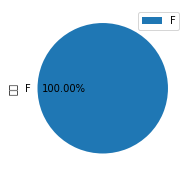

상황봉


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


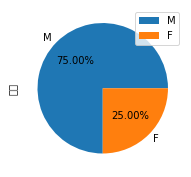

대야산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


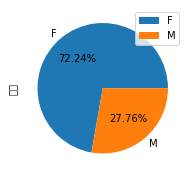

지리산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


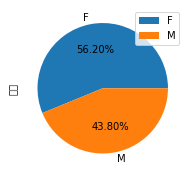

오대산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


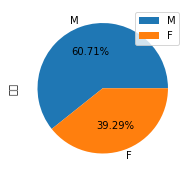

옥녀봉


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


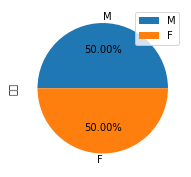

사패산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


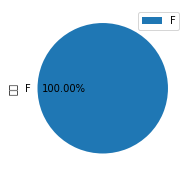

도락산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


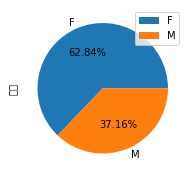

무등산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


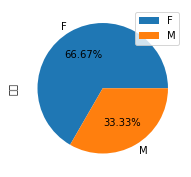

제비봉


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


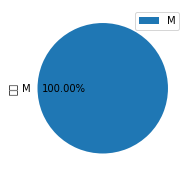

신선봉


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


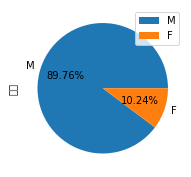

칠보산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


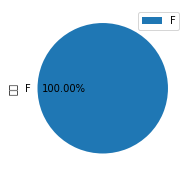

동대산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


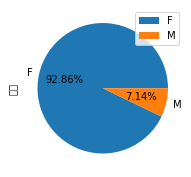

점봉산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


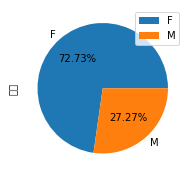

계룡산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


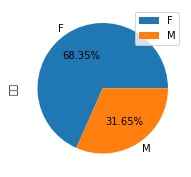

주왕산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


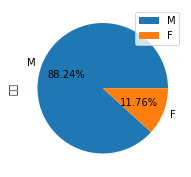

장군봉


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


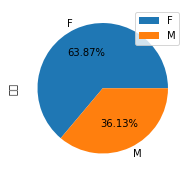

c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)


북한산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


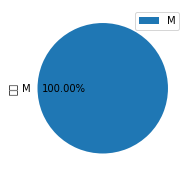

계방산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


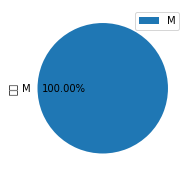

향로봉


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


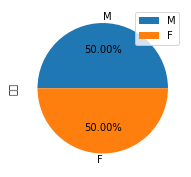

북바위산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


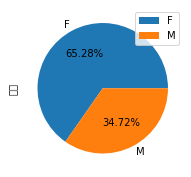

c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


태백산


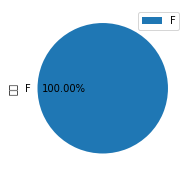

백안산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


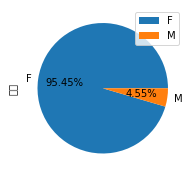

곰배령


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


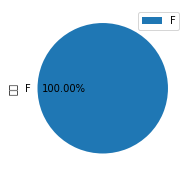

만연산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


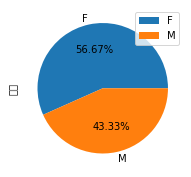

c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)


울산바위


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


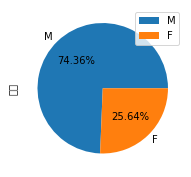

금수산


In [9]:
for mount in mount_list:
    cond = df2['추출단어명'] == mount
    df_mount = df2[cond]
    mylist = []
    mylist = df_mount['성별'].value_counts()
    fig = plt.figure(figsize = (3, 3))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    mylist.plot(kind = 'pie', autopct = lambda p : '{:.2f}%'.format(p))
    plt.legend()
    plt.show()
    print(mount)

# 산별 나이

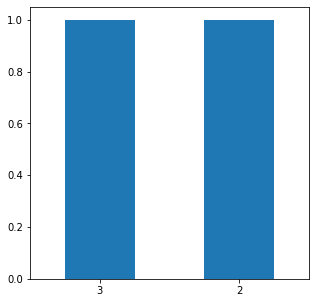

상황봉


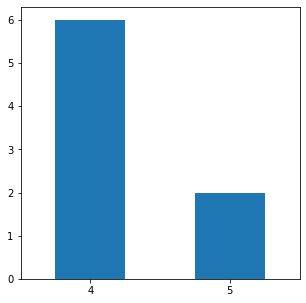

대야산


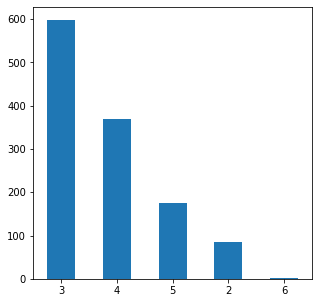

지리산


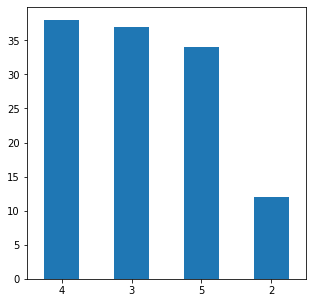

오대산


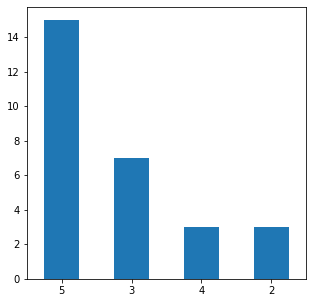

옥녀봉


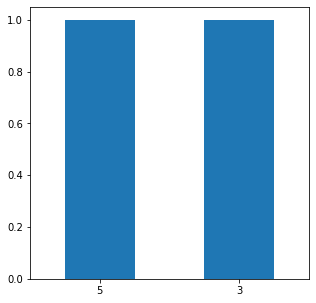

사패산


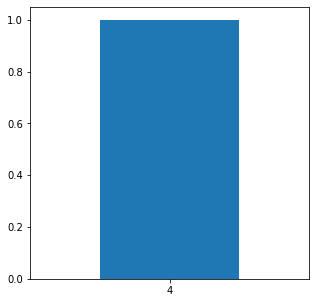

도락산


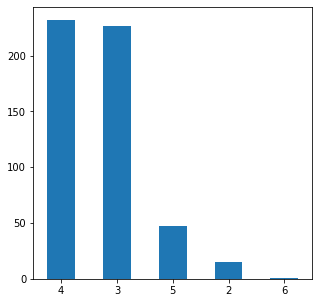

무등산


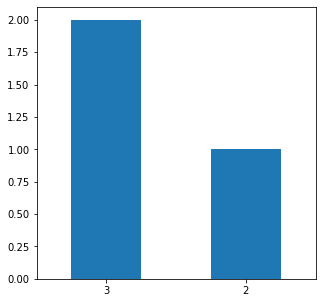

제비봉


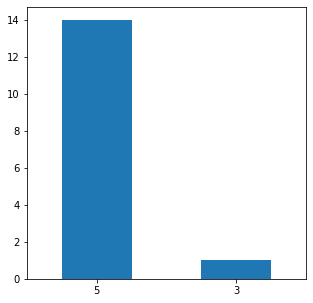

신선봉


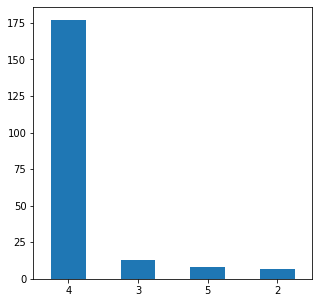

칠보산


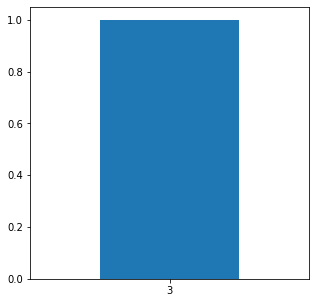

동대산


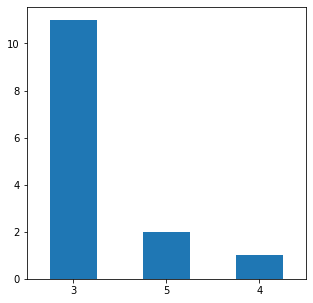

점봉산


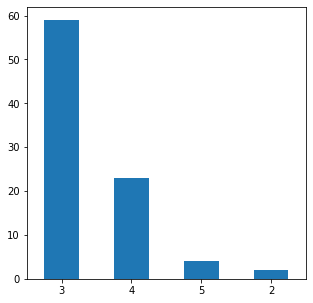

계룡산


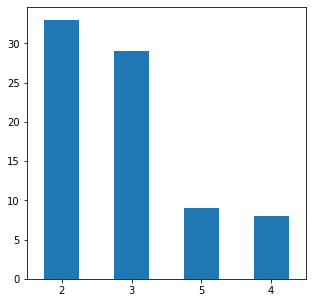

주왕산


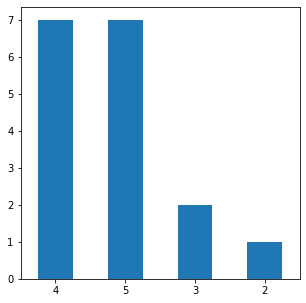

장군봉


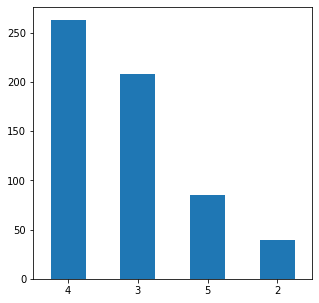

북한산


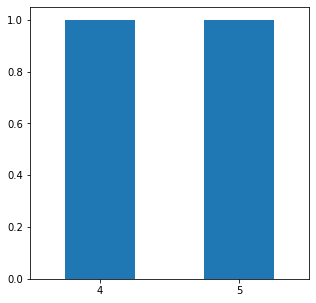

계방산


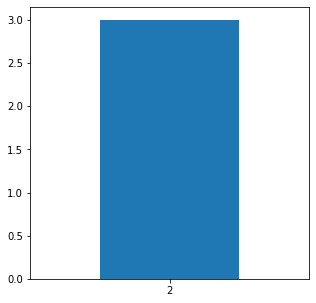

향로봉


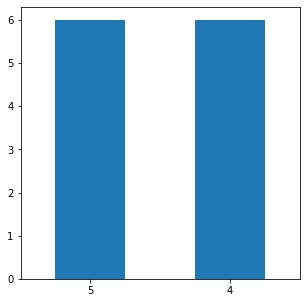

북바위산


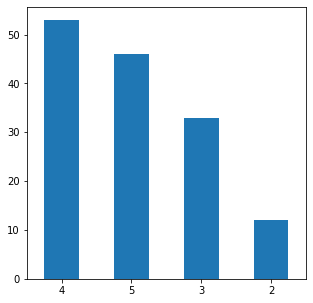

태백산


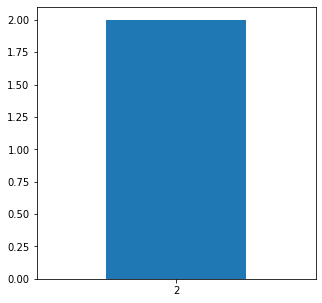

백안산


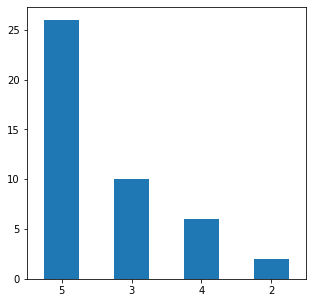

곰배령


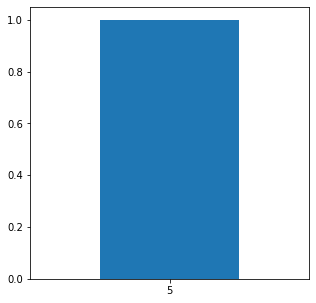

만연산


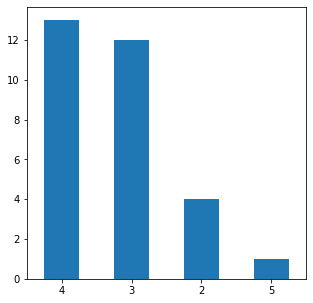

울산바위


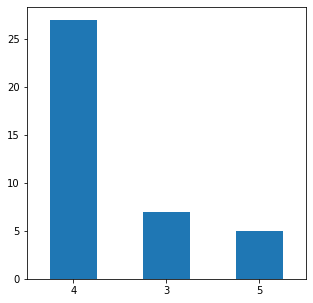

금수산


In [10]:
for mount in mount_list:
    cond = df2['추출단어명'] == mount
    df_mount = df2[cond]
    mylist = []
    mylist = df_mount['나이대'].value_counts()
    plt.rcParams['figure.figsize'] = (5, 5)
    mylist.plot(kind = 'bar')
    plt.xticks(rotation = 0)
    plt.show()
    print(mount)

# 산별 자녀 유무 (파랑이 자녀 있음)

c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

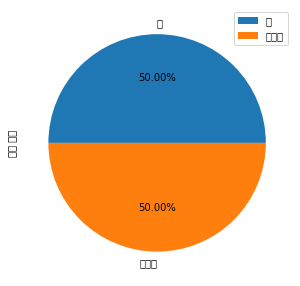

상황봉


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

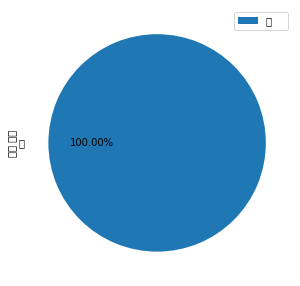

대야산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

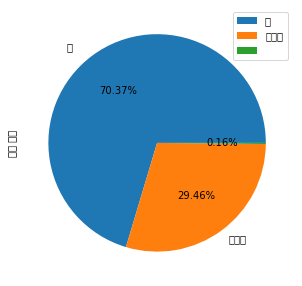

지리산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

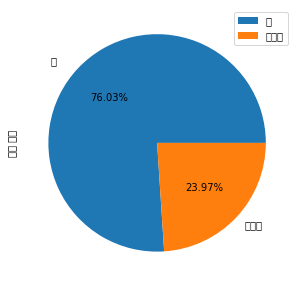

오대산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

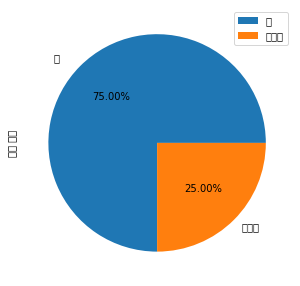

옥녀봉


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s

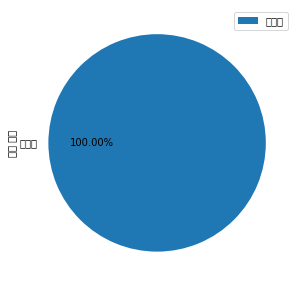

사패산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

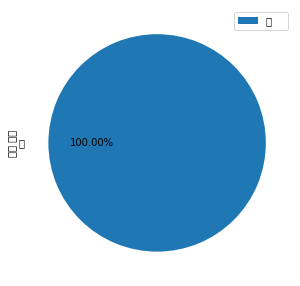

도락산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

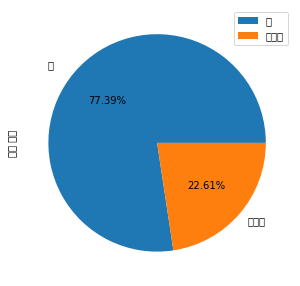

무등산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s

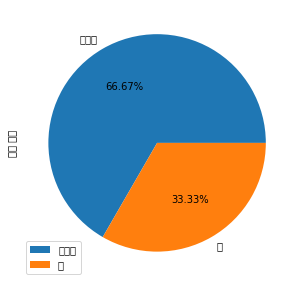

제비봉


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

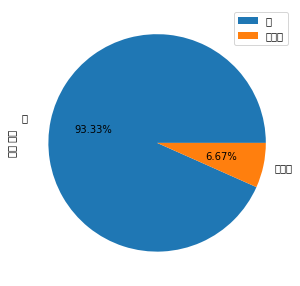

신선봉


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

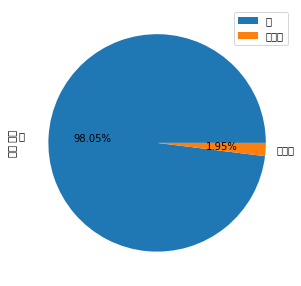

칠보산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

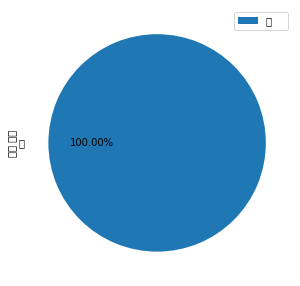

동대산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s

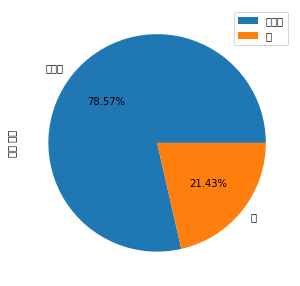

점봉산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

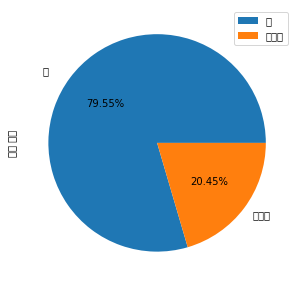

계룡산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s

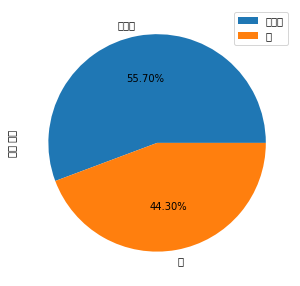

주왕산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

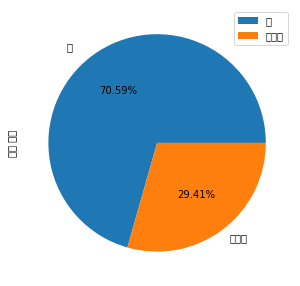

장군봉


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

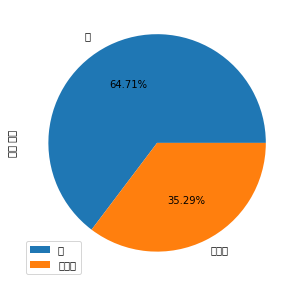

북한산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

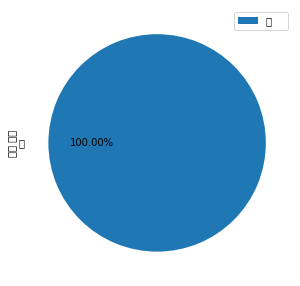

계방산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s

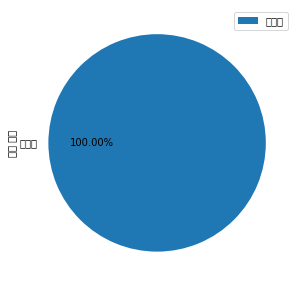

향로봉


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

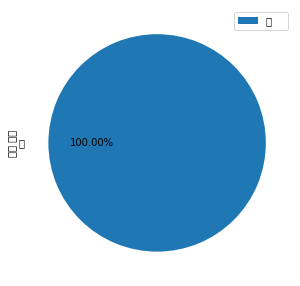

c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)


북바위산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s

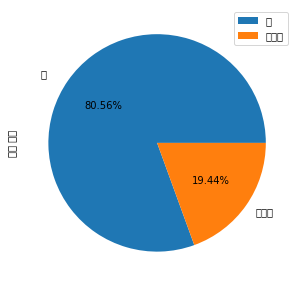

태백산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s

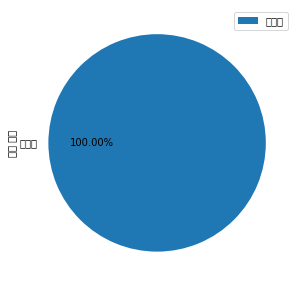

백안산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

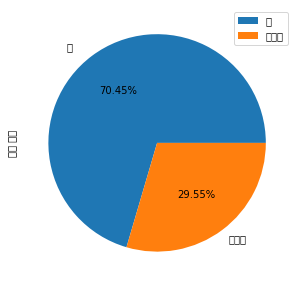

곰배령


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

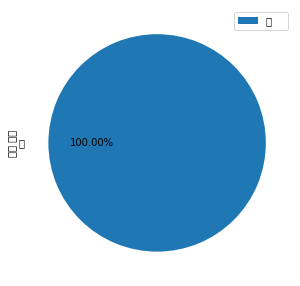

만연산


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

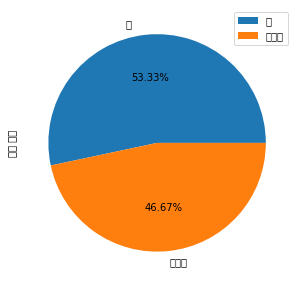

울산바위


c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\82107\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s

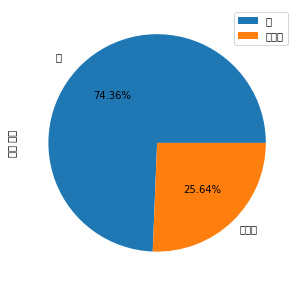

금수산


In [11]:
for mount in mount_list:
    cond = df2['추출단어명'] == mount
    df_mount = df2[cond]
    mylist = []
    mylist = df_mount['자녀 유무'].value_counts()
    fig = plt.figure(figsize = (5, 5))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    mylist.plot(kind = 'pie', autopct = lambda p : '{:.2f}%'.format(p))
    plt.legend()
    plt.show()
    print(mount)

# 국립공원 + 등산로 데이터 
## 국립공원과 일치하는 데이터들을 등산로 데이터와 연결

In [9]:
df3 = pd.read_csv("./data/등산로_국립공원.csv", encoding="UTF-8")
df4 = df3.groupby(['산명']).sum() #산명으로 그룹.
df4 = df4[['등산로길이(km)', '등산로상행시간', '등산로하행시간']]
df4

,등산로길이(km),등산로상행시간,등산로하행시간
산명,,,
계룡산,19.37,530,368
계방산,13.93,414,289
곰배령,1.99,60,42
금수산,6.85,156,109
대야산,12.92,303,211
도락산,39.06,775,534
동대산,126.42,2460,1718
만연산,24.93,451,312
무등산,18.80,332,237


In [10]:
list(df4.index)

['계룡산',
 '계방산',
 '곰배령',
 '금수산',
 '대야산',
 '도락산',
 '동대산',
 '만연산',
 '무등산',
 '백악산',
 '북바위산',
 '북배산',
 '북한산',
 '북한산_백운대',
 '사패산',
 '상황봉',
 '신성봉',
 '오대산',
 '오대산_노인봉',
 '옥녀봉',
 '울산바위',
 '장군봉',
 '점봉산',
 '제비봉',
 '주왕산',
 '지리산_천왕봉',
 '칠봉산',
 '태백산',
 '태백산_장군봉',
 '태백산둘레길',
 '태백산악훈련장',
 '향로봉']

In [11]:
df6 = pd.DataFrame(columns=['성별:여', '성별:남', '나이대:2', '나이대:3', '나이대:4', '나이대:5', '나이대:6', '자녀있음', '자녀없음']) #저장할 새로운 데이터프레임
df6

,성별:여,성별:남,나이대:2,나이대:3,나이대:4,나이대:5,나이대:6,자녀있음,자녀없음


In [12]:
gender = []
age = []
child = []


for mount in mount_list:
    cond = df2['추출단어명'] == mount #다시 국립공원(오류있음) 데이터파일 가져옴
    df_mount = df2[cond]
    
    gender = df_mount['성별'].value_counts()
    age = df_mount['나이대'].value_counts()
    child = df_mount['자녀 유무'].value_counts()
    
    try:
        df6.loc[mount, ['성별:여']]=gender['F']
    except:
        df6.loc[mount, ['성별:여']]=0 #없을 경우 0으로 지정
    try:
        df6.loc[mount, ['성별:남']]=gender['M']
    except:
        df6.loc[mount, ['성별:남']]=0
        
    try:
        df6.loc[mount, ['나이대:2']]=age[2]
    except:
        df6.loc[mount, ['나이대:2']]=0
    try:
        df6.loc[mount, ['나이대:3']]=age[3]
    except:
        df6.loc[mount, ['나이대:3']]=0
    try:
        df6.loc[mount, ['나이대:4']]=age[4]
    except:
        df6.loc[mount, ['나이대:4']]=0
    try:
        df6.loc[mount, ['나이대:5']]=age[5]
    except:
        df6.loc[mount, ['나이대:5']]=0
    try:
        df6.loc[mount, ['나이대:6']]=age[6]
    except:
        df6.loc[mount, ['나이대:6']]=0
        
    try:
        df6.loc[mount, ['자녀있음']]=child['예    ']
    except:
        df6.loc[mount, ['자녀있음']]=0
    try:
        df6.loc[mount, ['자녀없음']]=child['아니오']
    except:
        df6.loc[mount, ['자녀없음']]=0
        
    
    #print(gender)
    #print(age)
    #print(child)
    #print(mount)
    #print()

df6

,성별:여,성별:남,나이대:2,나이대:3,나이대:4,나이대:5,나이대:6,자녀있음,자녀없음
금수산,10,29,0,7,27,5,0,29,10
향로봉,0,3,3,0,0,0,0,0,3
상황봉,2,0,1,1,0,0,0,1,1
대야산,2,6,0,0,6,2,0,8,0
옥녀봉,11,17,3,7,3,15,0,21,7
지리산,890,342,86,598,370,176,2,867,363
만연산,1,0,0,0,0,1,0,1,0
장군봉,2,15,1,2,7,7,0,12,5
무등산,328,194,15,227,232,47,1,404,118
제비봉,2,1,1,2,0,0,0,1,2


# 등산로 + 국립공원

In [14]:
df7 = pd.concat([df4, df6], axis=1)
df7 = df7.drop(['칠보산', '칠봉산', '백악산', '백안산', '신선봉', '신성봉', '북배산']) #칠보산, 칠봉산, 백악산, 백안산, 신선봉, 신성봉, 북배산 제거 (두 데이터와 일치x)
df7.sort_values(by='성별:여', ascending=False)

,등산로길이(km),등산로상행시간,등산로하행시간,성별:여,성별:남,나이대:2,나이대:3,나이대:4,나이대:5,나이대:6,자녀있음,자녀없음
지리산,NaN,NaN,NaN,890,342,86,598,370,176,2,867,363
북한산,17.47,342.0,204.0,380,215,39,208,263,85,0,385,210
무등산,18.80,332.0,237.0,328,194,15,227,232,47,1,404,118
태백산,4.73,84.0,58.0,94,50,12,33,53,46,0,116,28
오대산,7.20,136.0,94.0,68,53,12,37,38,34,0,92,29
계룡산,19.37,530.0,368.0,64,24,2,59,23,4,0,70,18
주왕산,33.68,747.0,525.0,54,25,33,29,8,9,0,35,44
곰배령,1.99,60.0,42.0,42,2,2,10,6,26,0,31,13
울산바위,5.00,188.0,131.0,17,13,4,12,13,1,0,16,14
점봉산,29.96,543.0,381.0,13,1,0,11,1,2,0,3,11
